# Part 2. Topic analysis of positive and negative comments using LDA models

In [1]:
import os
import csv
import warnings
import time

import numpy as np
import matplotlib.pyplot as plt

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim

from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings('ignore')

## 1. Calculation of the optimal number of topics

### Function Design : Use Perplexity and Coherence 

In [2]:
def plot_perplexity(num_topics_range, perplexity_values, save_dir, file_name):
    plt.plot(num_topics_range, perplexity_values)
    plt.xlabel('Number of Topics')
    plt.ylabel('Perplexity')
    plt.title('Perplexity vs Number of Topics')
    plt.savefig(os.path.join(save_dir, file_name))
    plt.show()
    plt.close()

def plot_coherence_scores(num_topics_range, coherence_scores, save_dir, file_name):
    plt.plot(num_topics_range, coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Score vs Number of Topics')
    plt.savefig(os.path.join(save_dir, file_name))
    plt.show()
    plt.close()

def get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir):
    '''
    Compute the optimal number of topics.

    Parameters:
    file_path: str, the file path of the preprocessed text file.
    num_topics_range: list, the range of topic numbers to try.
    save_dir: str, the directory path to save the generated plots.

    Returns:
    best_num_topics: int, the optimal number of topics.
    '''

    # Read the file and create the corpus
    with open(file_path, 'r', encoding='utf-8') as f:
        corpus = [line.strip().split() for line in f]

    # Create the dictionary
    dictionary = Dictionary(corpus)

    # Train the LDA models with different topic numbers, and calculate the perplexity values
    perplexity_values = []
    lda_models = []
    for num_topics in num_topics_range:
        lda_model = LdaModel(corpus=[dictionary.doc2bow(text) for text in corpus], id2word=dictionary, num_topics=num_topics)
        lda_models.append(lda_model)
        perplexity_values.append(lda_model.log_perplexity([dictionary.doc2bow(text) for text in corpus]))

    # Generate unique file names based on current timestamp
    timestamp = str(time.time()).replace('.', '')  # Unique timestamp
    perplexity_file_name = f'perplexity_plot_{timestamp}.svg'
    coherence_file_name = f'coherence_plot_{timestamp}.svg'

    # Save the perplexity plot and coherence plot as vector images
    plot_perplexity(num_topics_range, perplexity_values, save_dir, perplexity_file_name)

    # Calculate the coherence scores using the perplexity values
    coherence_scores = [CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v').get_coherence() for lda_model in lda_models]

    # Save the coherence plot as a vector image
    plot_coherence_scores(num_topics_range, coherence_scores, save_dir, coherence_file_name)

    # Find the optimal number of topics based on the coherence scores
    best_num_topics_index = coherence_scores.index(max(coherence_scores))
    best_num_topics = num_topics_range[best_num_topics_index]
    
    print("Optimal number of topics (using perplexity method):", best_num_topics)

    return best_num_topics

### Function Design : Use Cosine_Similarity

In [3]:
def plot_similarity(num_topics_range, similarity_values, save_dir, file_name):
    plt.plot(num_topics_range, similarity_values)
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Cosine Similarity')
    plt.title('Average Cosine Similarity vs Number of Topics')
    plt.savefig(os.path.join(save_dir, file_name))
    plt.show()
    plt.close()

def get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir):
    '''
    Compute the optimal number of topics.

    Parameters:
    file_path: str, the file path of the preprocessed text file.
    num_topics_range: list, the range of topic numbers to try.
    save_dir: str, the directory path to save the generated plots.

    Returns:
    best_num_topics: int, the optimal number of topics.
    '''

    # Read file and create corpus
    with open(file_path, 'r', encoding='utf-8') as f:
        corpus = [line.strip().split() for line in f]

    # Create dictionary
    dictionary = gensim.corpora.Dictionary(corpus)

    # Train LDA model and compute cosine similarity between topics for different number of topics
    similarity_values = []
    for num_topics in num_topics_range:
        lda_model = gensim.models.ldamodel.LdaModel(corpus=[dictionary.doc2bow(text) for text in corpus], id2word=dictionary, num_topics=num_topics)
        topics_matrix = lda_model.get_topics()
        cosine_similarities = cosine_similarity(topics_matrix)
        similarity_values.append(np.mean(cosine_similarities[np.triu_indices(num_topics, k=1)]))

    # Generate a unique file name based on current timestamp
    timestamp = str(time.time()).replace('.', '')  # Unique timestamp
    file_name = f'similarity_plot_{timestamp}.svg'

    # Save the similarity plot as a vector image
    plot_similarity(num_topics_range, similarity_values, save_dir, file_name)

    # Find the optimal number of topics
    best_num_topics_index = similarity_values.index(min(similarity_values))
    best_num_topics = num_topics_range[best_num_topics_index]
    
    print("Optimal number of topics (using cosine similarity method):", best_num_topics)
    
    return best_num_topics

### Call the function to output the respective optimal number of topics

In [4]:
# Create a list of integers for the range of number of topics.
num_topics_range = list(range(3, 10))

# Set the path to save the vector image
save_dir = "../images/Optimal_topics_number_search"

#### For stores 1

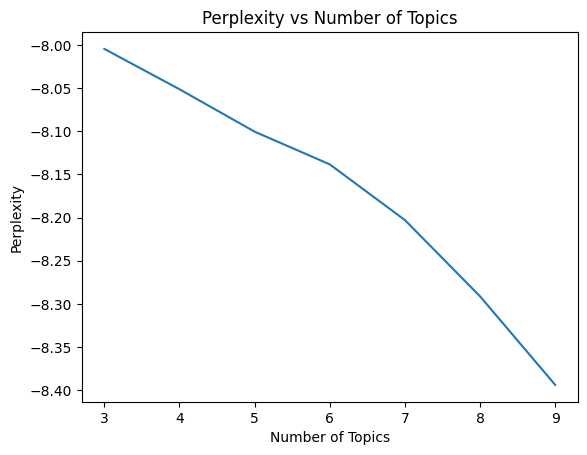

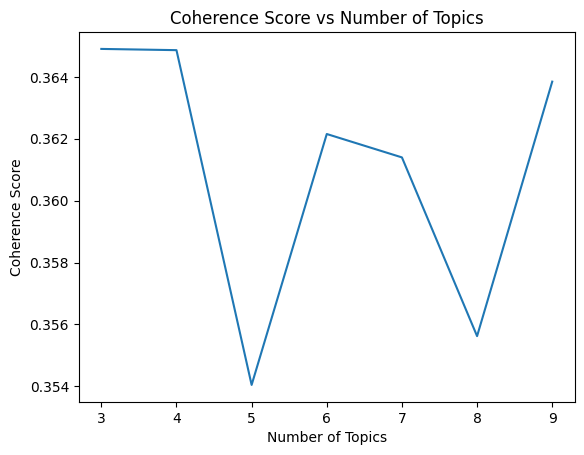

Optimal number of topics (using perplexity method): 3


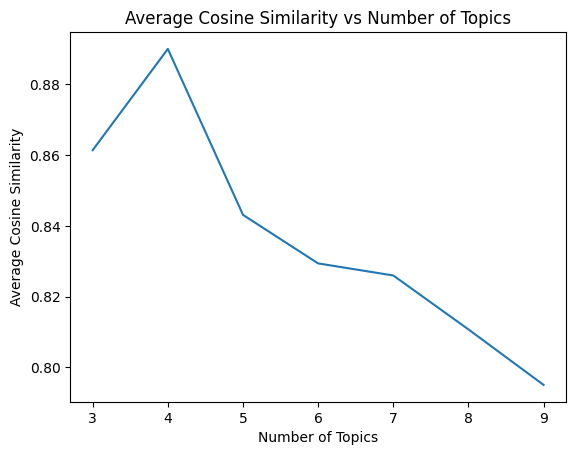

Optimal number of topics (using cosine similarity method): 9
Ultimate optimal number of topics : 6


In [5]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_1_polarity_P.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
P1_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", P1_best_num_topics)

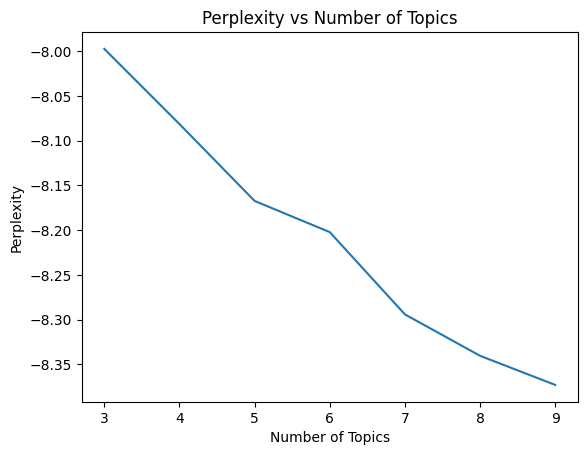

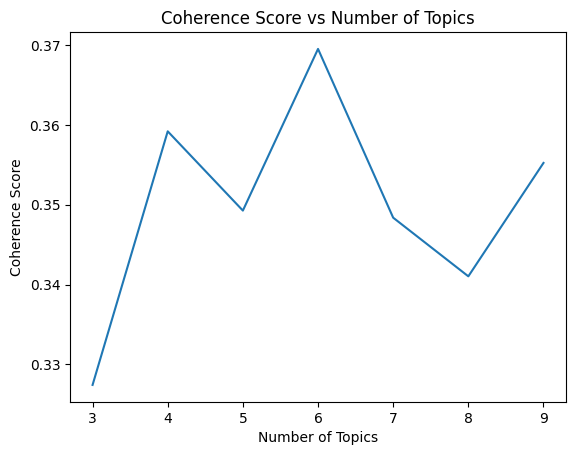

Optimal number of topics (using perplexity method): 6


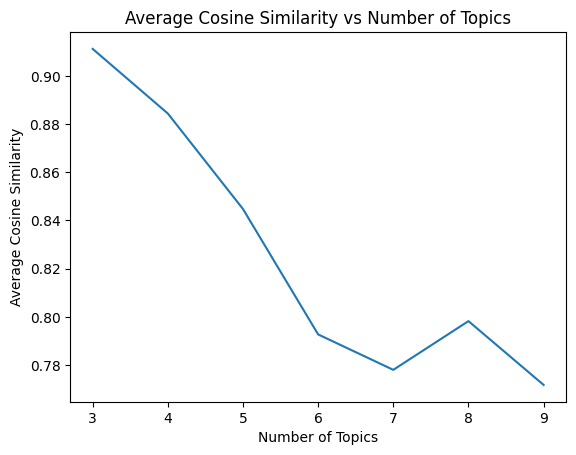

Optimal number of topics (using cosine similarity method): 9
Ultimate optimal number of topics : 7


In [6]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_1_polarity_N.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
N1_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", N1_best_num_topics)

#### For stores 2

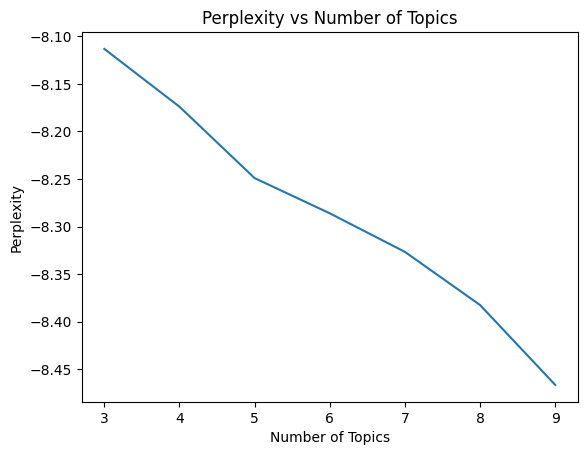

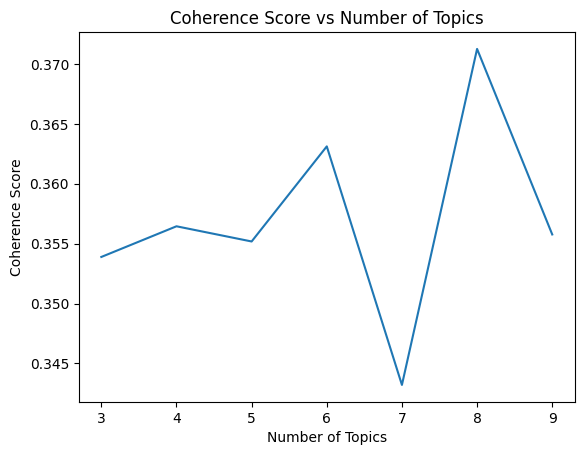

Optimal number of topics (using perplexity method): 8


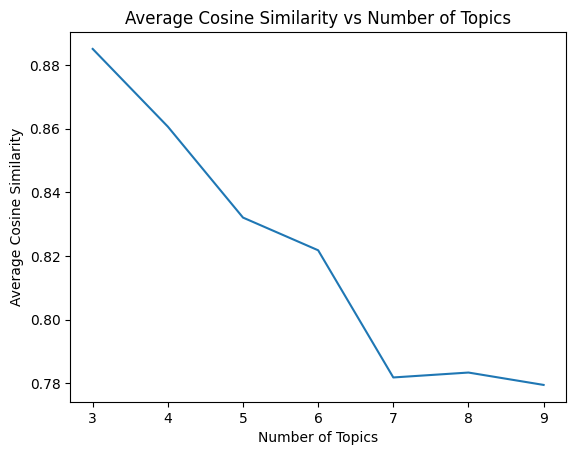

Optimal number of topics (using cosine similarity method): 9
Ultimate optimal number of topics : 8


In [7]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_2_polarity_P.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
P2_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", P2_best_num_topics)

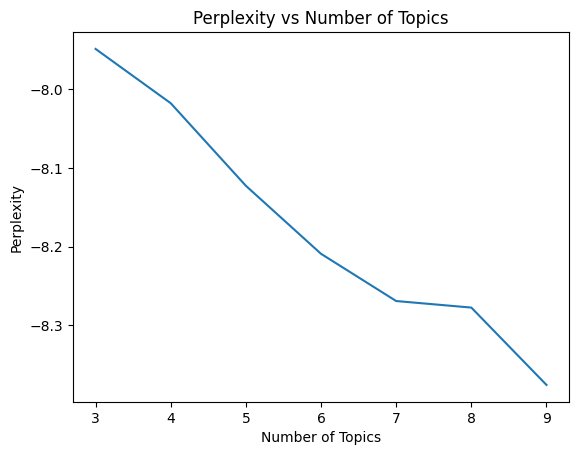

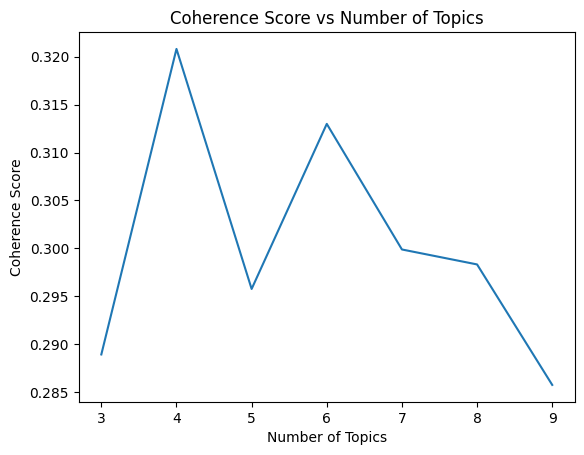

Optimal number of topics (using perplexity method): 4


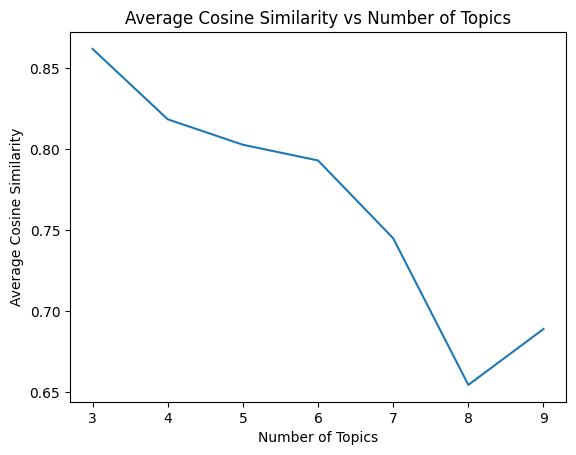

Optimal number of topics (using cosine similarity method): 8
Ultimate optimal number of topics : 6


In [8]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_2_polarity_N.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
N2_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", N2_best_num_topics)

#### For stores 3

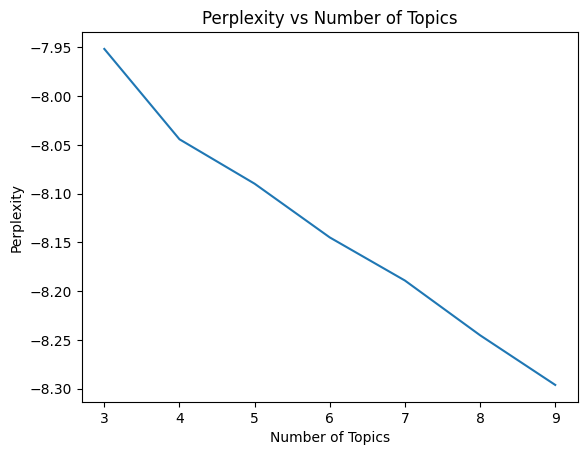

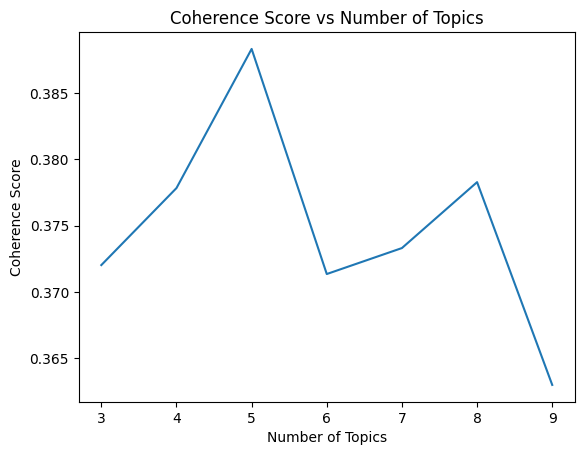

Optimal number of topics (using perplexity method): 5


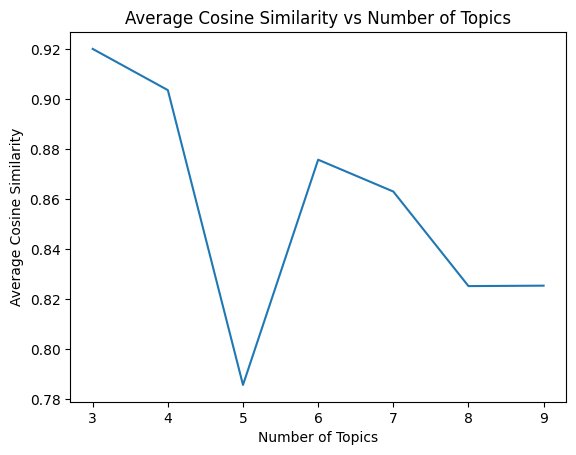

Optimal number of topics (using cosine similarity method): 5
Ultimate optimal number of topics : 5


In [9]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_3_polarity_P.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
P3_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", P3_best_num_topics)

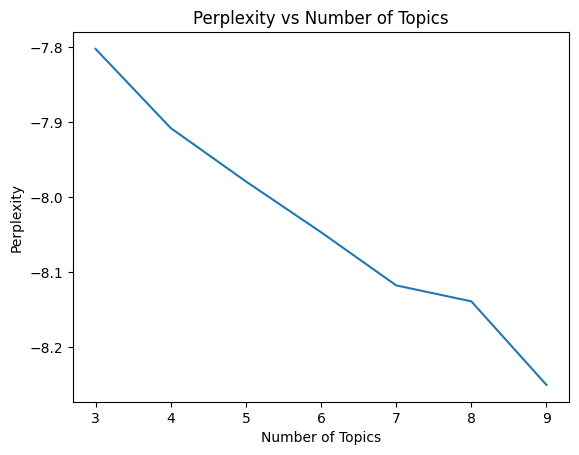

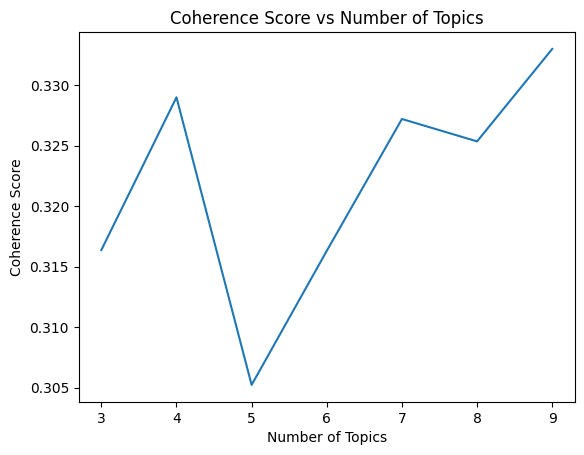

Optimal number of topics (using perplexity method): 9


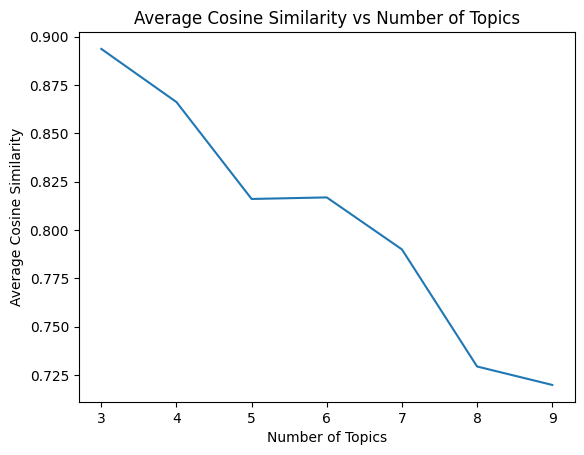

Optimal number of topics (using cosine similarity method): 9
Ultimate optimal number of topics : 9


In [10]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_3_polarity_N.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
N3_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", N3_best_num_topics)

#### For stores 4

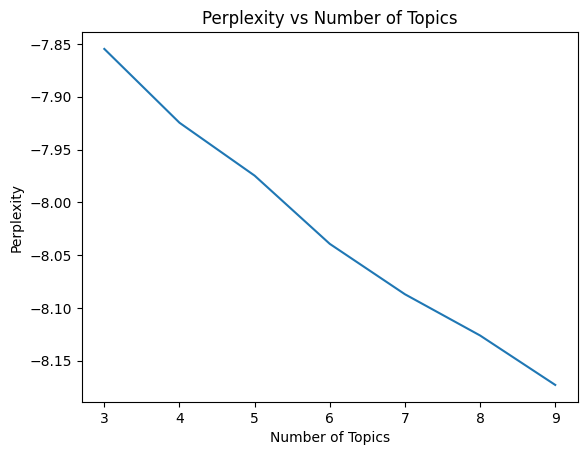

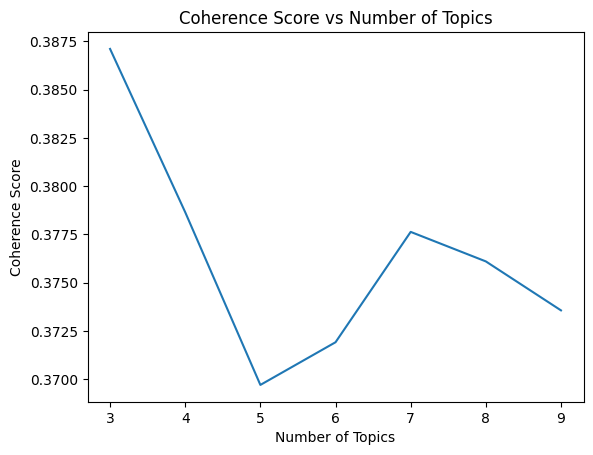

Optimal number of topics (using perplexity method): 3


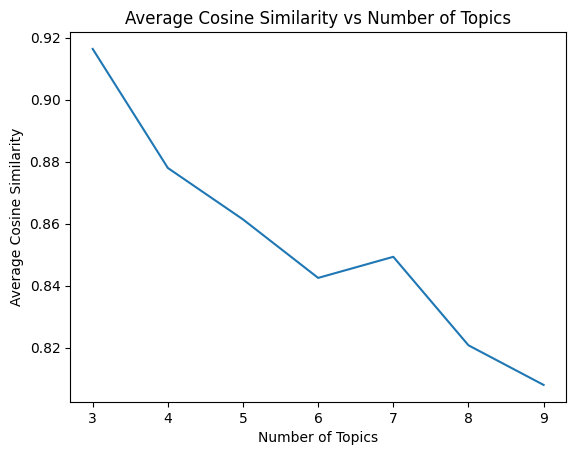

Optimal number of topics (using cosine similarity method): 9
Ultimate optimal number of topics : 6


In [11]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_4_polarity_P.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
P4_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", P4_best_num_topics)

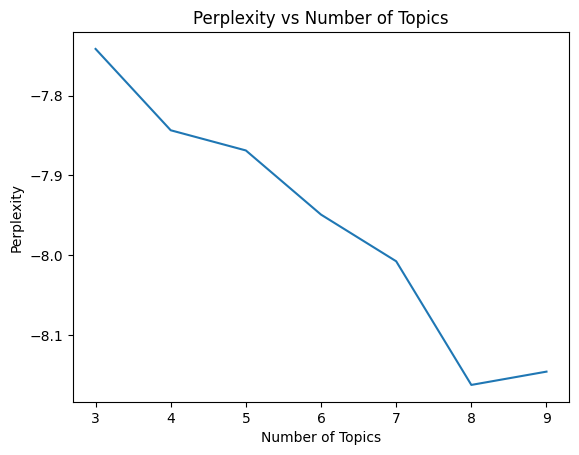

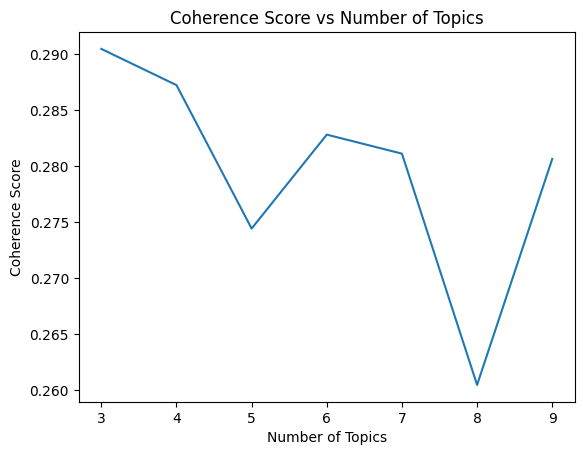

Optimal number of topics (using perplexity method): 3


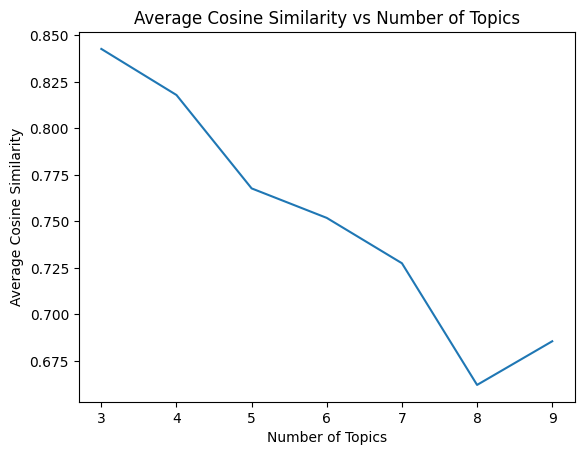

Optimal number of topics (using cosine similarity method): 8
Ultimate optimal number of topics : 5


In [12]:
# Set the file path for a text file.
file_path = "../data/review/analysis/polarity/reviews_4_polarity_N.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
N4_best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", N4_best_num_topics)

## 2. Get Topic-Word Distribution

### Function design : LDA model training, topic-word distribution output and visualization

In [13]:
def lda_topic_modeling(file_path, num_topics):
    # Read the text file
    with open(file_path, "r", encoding="utf-8") as f:
        texts = [line.strip().split() for line in f]

    # Build the dictionary and bag-of-words model
    dictionary = Dictionary(texts)
    print(dictionary)
    
    # Filter out extreme terms based on frequency and document proportion
    dictionary.filter_extremes(no_below=5, no_above=0.1)
    print(dictionary)
    
    # Convert texts into bag-of-words format
    corpus = [dictionary.doc2bow(doc) for doc in texts]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, 
                         num_topics=num_topics, 
                         id2word=dictionary, 
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)

    # Print the top keywords for each topic
    for topic_id in range(num_topics):
        topic_words = lda_model.show_topic(topic_id, topn=20)
        print("Topic {}: {}".format(topic_id, ", ".join([word for word, prob in topic_words])))

    # Compute visualization data for the LDA model
    vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

    # Extract a portion of the file path as the filename
    filename = os.path.splitext(os.path.basename(file_path))[0]
    filename = "pyLDAvis/lda_visualization_{}.html".format(filename)

    # Save the visualization as an HTML file
    pyLDAvis.save_html(vis_data, filename)
    print("Visualization saved as:", filename)

### Call the function to Complete LDA theme analysis

#### For stores 1

#### Postive review

In [14]:
file_path = "../data/review/analysis/polarity/reviews_1_polarity_P.txt"
lda_topic_modeling(file_path, P1_best_num_topics)

Dictionary<15013 unique tokens: ['apm', '一圈', '一家', '不错', '云集']...>
Dictionary<3054 unique tokens: ['一圈', '一家', '云集', '交通', '人气']...>
Topic 0: 时尚, 步行街, 苹果, 一家, 餐饮, 新, 东西, 层, 体验, 装修, 中, 老, 新东安, 美食, 年轻人, 走, 更, 点, 好像, 有个
Topic 1: 朋友, 发现, 太, 爱, 过, 外婆家, 打折, 味道, 可爱, 想, 希望, 前, 豆, 算, 可, 海绵, 茶, 约, 心动, 区
Topic 2: 超级, 好看, 主题, 泡泡玛特, 展览, 折扣, 开心, 没什么, 两层, 拍照, 营业, 下班, 开业, 时间, 高大, 这样, 展, 赶上, 盲盒, 超大
Topic 3: 服务, 年轻, 消毒, 电影院, 消费, pm, 晚上, 电梯, 宝宝, 价格, 电影, 大气, 服装, 娃娃, 机, 王府井大街, 外面, 工作人员, 游客, 东来顺
Topic 4: 一些, 店铺, 很大, 好多, 餐厅, 大牌, 没, 排队, 楼上, 期间, 适合, 不少, 好吃, 王府井大街, 位置, 齐全, 每次, 吃喝玩乐, 衣服, 做
Topic 5: 东安市场, 兰蔻, 好去处, 快, 玩具, 拍照, 大厅, 北京王府井, 游戏, 过年, 小样, 气氛, 吸引, 鞋子, 节日, 元旦, 小朋友, 布置, 娃, 领
Visualization saved as: pyLDAvis/lda_visualization_reviews_1_polarity_P.html


#### Negative review

In [15]:
file_path = "../data/review/analysis/polarity/reviews_1_polarity_N.txt"
lda_topic_modeling(file_path, N1_best_num_topics)

Dictionary<5565 unique tokens: ['休息', '地方', '坐下', '座位', '想']...>
Dictionary<686 unique tokens: ['休息', '想', '顾客', '不像', '不错']...>
Topic 0: 东安市场, 逛街, 非常, APM, 装修, 步行街, 苹果, 最, 走, 店铺, 体验, 价格, 进门, 过, 排队, 服务, 电影, 选择, 很少, 门口
Topic 1: 展览, 打卡, 拍照, 点评, 开门, 展, 中庭, 约, 主题, 便宜, 二层, 饭, 皮克斯, 时间, 可爱, 晚上, 那么, 百货大楼, 熊, 适合
Topic 2: 不过, 好多, 不错, 特别, 喜欢, 泡泡玛特, 购物, 老, 溜达, 不少, 有些, 里, 一圈, 一楼, 盲盒, 大牌, 逛逛, 有个, 搞, 改造
Topic 3: 衣服, 打折, 折扣, 周末, ️, 店铺, 划算, 王府井大街, 开, 折, 听说, 商户, 牌子, 那种, 号, 不会, 没什么, 孩子, 点, 特别
Topic 4: 朋友, 层, 月, APM, 年, 这家, 力度, 美食, 少, 位于, 想, 里, 回忆, 电影院, 小伙伴, 餐饮, 找, 味道, 有点, 区
Topic 5: 一些, 楼上, 餐厅, 一家, 很大, 闭店, 撤店, 化妆品, 中, 发现, 更, 兰蔻, 转, 整体, 算是, 不好, 只能, 旗舰店, 对面, 小样
Topic 6: 新东安, 做, 停车场, 地下, 营业, 影响, 顾客, 里, 不到, 几个, 好像, 餐饮, 口罩, 有点, 排队, 找, 不要, 态度, 厕所, 不能
Visualization saved as: pyLDAvis/lda_visualization_reviews_1_polarity_N.html


#### For stores 2

#### Postive review

In [16]:
file_path = "../data/review/analysis/polarity/reviews_2_polarity_P.txt"
lda_topic_modeling(file_path, P2_best_num_topics)

Dictionary<13534 unique tokens: ['cafelandmark', '一共', '一块', '一杯', '上班']...>
Dictionary<2477 unique tokens: ['一共', '一块', '一杯', '上班', '价格']...>
Topic 0: 太, 一些, 吃饭, 挺, 高大, 餐饮, 说, 云集, 一家, 服务, 干净, 不是, 朋友, 卫生间, 整体, 步行街, 中环, 奢侈品, 设施, 很大
Topic 1: 巧克力, 活动, 适合, 周末, 积分, 少, 好吃, 草坪, 小时, 人少, 外面, 店铺, 新, 更, 玩, 好多, 推荐, 排队, 门口, 晚上
Topic 2: 孩子, 中, 没, 疫情, 消费, 想, 走, 王府, 做, 装饰, 很少, 气氛, 热闹, 开, 溜达, 寰, 故宫, 圣诞节, 怪物, 节日
Topic 3: 怪兽, 可爱, 可可, 拍照, 展览, 超级, 主题, 爱, 有趣, 好看, 拍, 发现, 艺术, 可, 风车, 动, 停车场, 卡通, 大衣, 楼
Topic 4: ️, 展, 点评, 兑换, 奇趣, 制作, 店内, 元, 机会, 区域, 互动, 西座, 档次, 月, 一杯, 蛮, 合影, 手, 造型, 充满
Topic 5: 工厂, 王府中環, 时尚, 蛋糕, 吸引, 设计, 新年, 生活, 香港, 翠园, 芝乐坊, 期间, 绝对, 中心, 文化, 有个, 价格, 下次, 芝士, 酒店
Topic 6: 带, 小朋友, 圣诞, 娃, 算是, 宝宝, 遛, 溜, 包包, 玩偶, 家, 层, 一线, 滑冰场, 四层, 换, 几年, 款, 积分, 旁边
Topic 7: 逛逛, 下午茶, 牌子, 一楼, 进门, 那么, 书店, 齐全, 上档次, 第一次, 点, 不过, 选择, 高级, 开业, 不用, 时间, 值得, 这是, 相对
Visualization saved as: pyLDAvis/lda_visualization_reviews_2_polarity_P.html


#### Negative review

In [17]:
file_path = "../data/review/analysis/polarity/reviews_2_polarity_N.txt"
lda_topic_modeling(file_path, N2_best_num_topics)

Dictionary<3892 unique tokens: ['B', 'DROPOFF', '不是', '东', '位置']...>
Dictionary<362 unique tokens: ['B', '不是', '位置', '停车场', '免费']...>
Topic 0: 吃饭, 朋友, 做, 停车场, 小时, 赶上, 购物, 这样, 确实, 蛋糕, ️, 建议, 点, 适合, 工作日, 进, 元, 路过, 家, 服务
Topic 1: 非常, 餐厅, 门口, 喜欢, 步行街, 位置, 有点, 发现, 进门, 打卡, 卫生间, 几个, 不是, 蛮, 奢侈, 有个, 场地, 位于, 全, 一点
Topic 2: 主题, 里, 一些, 中环, 展, 期间, 冰场, 牌子, 特别, 布置, 有些, 场景, 店, 拍照, 真心, 总体, 想, 娃, skp, 设施
Topic 3: 圣诞节, 票, 两个, 排队, 喝, 青年节, 世界, 积分, 时间, 呆, 拔草, 周末, 哈哈哈, 现场, 货, 提前, 不想, 找, 咖啡店, 下午
Topic 4: 孩子, 带, 展览, 滑冰, 走, 不过, 可惜, 小朋友, 没什么, 停车费, 风车, 做, 草坪, 购物中心, 二层, 转, 吸引, 赶紧, 好看, 喷泉
Topic 5: 工厂, 巧克力, 怪兽, 怪物, 王府中環, 可可, 创意, 装修, 娃, 风格, 不要, 甜品, 大部分, 云集, 高端, 爱, 王府井大街, 店铺, 高, 饰品
Visualization saved as: pyLDAvis/lda_visualization_reviews_2_polarity_N.html


#### For stores 3

#### Postive review

In [18]:
file_path = "../data/review/analysis/polarity/reviews_3_polarity_P.txt"
lda_topic_modeling(file_path, P3_best_num_topics)

Dictionary<8849 unique tokens: ['一楼', '五花八门', '价格', '全国劳模', '北京']...>
Dictionary<1409 unique tokens: ['一楼', '价格', '全国劳模', '品类', '商品']...>
Topic 0: 玩具, 老牌, 东西, 王府井百货, 不是, 最, 建筑, 游客, 逛逛, 环境, 购物, 装修, 逛街, 一些, 更, 有个, 不过, 开, 适合, 和平果局
Topic 1: 胡同, 年代, 记忆, 拍照, 感, 儿时, 生活, 怀旧, 带, 体验, 朋友, 有意思, 满满的, B, 吃, 回到, 还原, 想, 场景, 和平果局
Topic 2: 没, 化妆品, 门口, 喷泉, 疫情, 一楼, 活动, 兰蔻, 位置, 音乐, 时尚, 样机, 路过, 排队, 专柜, 吸引, 好像, 说, 晚上, 整体
Topic 3: 卖, 吃, 糖果, ️, 味道, 最, 服务, 样子, 柜台, 变化, 过, 尤其, 楼, 值得, 购物, 依然, 外面, 当年, 点评, 繁华
Topic 4: 店, 年, 位于, 百货, 第一, 孩子, 大型, 商店, 成立, 零售, 第一座, 建造, 月, 玩, 被誉为, 大楼, 开业, 全国, 发展, 经营
Visualization saved as: pyLDAvis/lda_visualization_reviews_3_polarity_P.html


#### Negative review

In [19]:
file_path = "../data/review/analysis/polarity/reviews_3_polarity_N.txt"
lda_topic_modeling(file_path, N3_best_num_topics)

Dictionary<3602 unique tokens: ['一层', '之选', '优秀', '吃', '商场']...>
Dictionary<339 unique tokens: ['工作人员', '建议', '时代', '选择', '那种']...>
Topic 0: 王府井百货, 步行街, 喜欢, 小吃, 算是, 那么, 周末, 孩子, 平时, 停车场, 不错, 消费, 一些, 大楼, 人气, 很大, 期间, 喷泉, 几个, 可
Topic 1: 人不多, 排队, 小样, 领, 停车, 够, 好久没, 差, 娃, 圣地, 挺, 有意思, 雅诗兰黛, 人多, 羊毛, 薅, 点评, 全, 眼霜, 人员
Topic 2: 化妆品, 挺, apm, 品牌, 对面, 年, 活动, 体验, 大牌, 旁边, 找到, 历史, 少, 步行街, 不过, 特别, 发现, 王府中环, 北京市, 希望
Topic 3: 满满的, 不用, 排队, 和平果局, 录像厅, 哈姆雷, 小时, 游戏机, 斯, 完全, 孩子, 久, 牌子, 保安, 没法, 不够, 豆汁, 大人, 风格, 历史
Topic 4: 拍照, 门口, 卖, 打卡, 味道, 和平菓局, 想, 态度, 店, 不错, 楼, 做, 路过, 拍, 童年, 问, 没什么, 还原, 繁华, 糖果
Topic 5: 太, 过, 和平果局, 一楼, 张秉贵, 样机, 和平菓局, 晚上, 柜台, 楼上, 物件, 最, 兰蔻, 打卡, 衣服, 展览, 下次, 逛逛, 特别, 不过
Topic 6: 位置, 儿时, 记忆, 年代, 火车, 一些, 有些, 挺, 负, 朋友, 环境, 变化, 怀旧, 前, 好多, 回到, 每次, 绿皮, 八十年代, B
Topic 7: 玩, 玩具, 逛逛, 生活, 过, 发现, 场景, 时间, 不少, 坐, 本来, 旋转, 木马, 选择, 不能, 期间, 做, 找, 小朋友, 转转
Topic 8: 价格, 有点, 服务, 慢慢, 孩子, 玩具店, 购买, 服务员, 蛮, 主题, 区, 不要, 外地人, 没来, 美好, 过年, 听, 走, 这样, 儿童
Visualization saved as: pyLDAvis/lda_visualization_reviews_3_polarity_N.html

#### For stores 4

#### Postive review

In [20]:
file_path = "../data/review/analysis/polarity/reviews_4_polarity_P.txt"
lda_topic_modeling(file_path, P4_best_num_topics)

Dictionary<6679 unique tokens: ['一风堂', '不错', '停车', '吃', '商场']...>
Dictionary<960 unique tokens: ['地铁站', '很大', '想', '服装店', '汤城小厨']...>
Topic 0: 店铺, 逛街, 服务, 真的, 有点, 很大, 太, 干净, 一家, 每次, 找, 整体, 几个, 想, 楼下, 买, 发现, 消费, 不少, 换
Topic 1: 位置, 逛逛, 东西, 高端, 适合, 地铁站, 最, 一些, 美食, 餐厅, 高, 买, 好多, 地理位置, 交通, 带, 少, 好吃, 价格, 不是
Topic 2: 新天地, 拍照, 年, 超级, 站, 打卡, 喷泉, 这家, 全, 主题, 步行街, 号线, 新年, 中国, 气氛, 繁华, 营业, 鼠年, 爱, 人流量
Topic 3: 免费, 小时, 可爱, 积分, 齐全, 会员, 停车场, 喝, 体验, 展, 商户, 周末, 街, 路过, 展览, 大食代, 感, 小伙伴, 茶, 味道
Topic 4: 没, 里, 走, 开, 开心, 朋友, 说, 时间, 可, 不过, 扭蛋, 不会, 热闹, 那么, 过, 一圈, 完, 希望, 溜达, 晚上
Topic 5: 东方广场, 大牌, 位于, 时尚, 娱乐, 休闲, 设施, 云集, 高大, 商业, 商业街, 算, 购物中心, 王府井大街, 交通, 不少, 便利, 面积, 装修, 点
Visualization saved as: pyLDAvis/lda_visualization_reviews_4_polarity_P.html


#### Negative review

In [21]:
file_path = "../data/review/analysis/polarity/reviews_4_polarity_N.txt"
lda_topic_modeling(file_path, N4_best_num_topics)

Dictionary<2626 unique tokens: ['一站式', '不便', '东长安街', '享受', '人流']...>
Dictionary<173 unique tokens: ['价格', '停车', '吃喝玩乐', '白领', '美食']...>
Topic 0: 店, 太, 找, 保安, 步行街, 消费, 期间, 站, 第一次, 赶上, 点, 完, 问, 号线, 路口, 不到, 喜欢, 很久没, 逛逛, 门
Topic 1: 积分, 开门, 停车场, 大牌, 有点, 不少, 商铺, 王府井大街, 不错, 溜达, 购物, 停车, 服务台, 大食代, 不会, 很大, 位置, 冷清, 出, 人气
Topic 2: 顾客, 好多, 带, 过, 旁边, 转, 厕所, 关门, 工作人员, 有人, 很少, 有些, 一圈, 问, 回家, 玩, 客人, 逛街, 商家, 原因
Topic 3: 特别, 餐饮, 长安街, 一些, 区, 第一次, 找到, 早, 打卡, 小时, 这家, 商圈, 开, 广场, 逛一逛, 面积, 一点, 逛街, 布局, 购物
Topic 4: 电影, 超市, 服务, 朋友, 中午, 买, 上班, 位置, 咖啡, 最, 有点, 有个, 找, 春节, 希望, 体验, 玩, 写字楼, 前, 找到
Visualization saved as: pyLDAvis/lda_visualization_reviews_4_polarity_N.html


## 3. LDA thematic analysis of all review texts in the business circle

### Get the optimal number of topics (same as below)

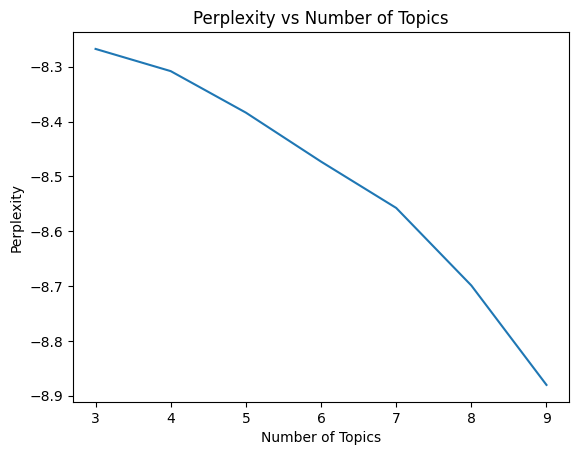

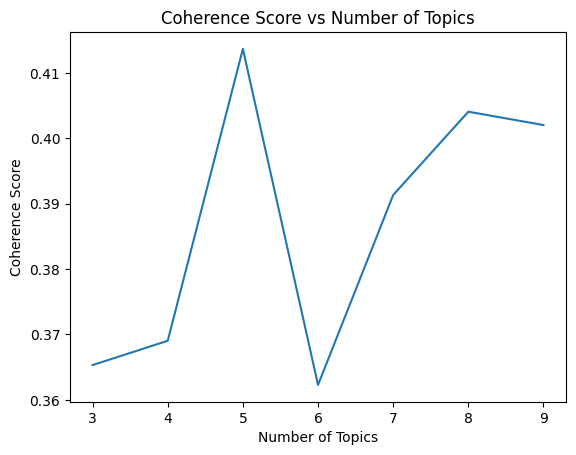

Optimal number of topics (using perplexity method): 5


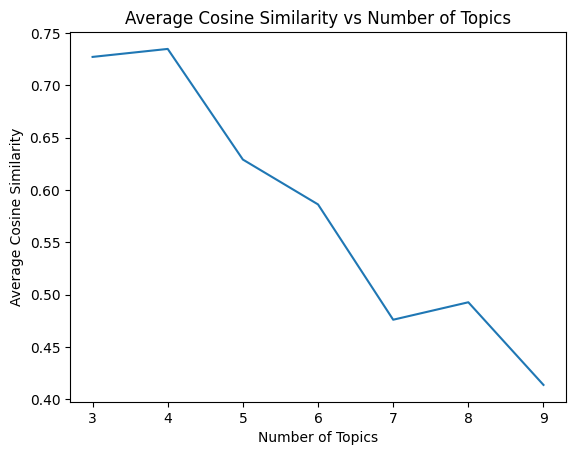

Optimal number of topics (using cosine similarity method): 9
Ultimate optimal number of topics : 7


In [22]:
# Set the file path for a text file.
file_path = "../data/review/processed/reviews_merged.txt"

# Get the optimal number of topics based on perplexity and cosine similarity.
best_num_topics_perplexity = get_optimal_topic_num_by_perplexity(file_path, num_topics_range, save_dir)
best_num_topics_similarity = get_optimal_topic_num_by_similarity(file_path, num_topics_range, save_dir)

# Print the ultimate optimal number of topics.
best_num_topics = int((best_num_topics_perplexity + best_num_topics_similarity)/2)
print("Ultimate optimal number of topics :", best_num_topics)

### Improve " lda_topic_modeling " function, adjust parameters and add new functions

In [23]:
def lda_topic_modeling_with_assignment(file_path, num_topics, output_file):
    # Read the text file
    with open(file_path, "r", encoding="utf-8") as f:
        comments = [line.strip() for line in f]

    # Build the dictionary and bag-of-words model
    dictionary = Dictionary([comment.split() for comment in comments])
    print(dictionary)
    dictionary.filter_extremes(no_below=5, no_above=0.1)
    print(dictionary)
    
    # Convert comments into bag-of-words format
    corpus = [dictionary.doc2bow(comment.split()) for comment in comments]

    # Train the LDA model
    lda_model = LdaModel(corpus=corpus, 
                         num_topics=num_topics, 
                         id2word=dictionary, 
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)

    # Assign topics to comments
    topic_assignments = []
    for bow in corpus:
        doc_topics = lda_model.get_document_topics(bow)
        topic_assignments.append(max(doc_topics, key=lambda x: x[1])[0])

    # Print the top keywords for each topic
    for topic_id in range(num_topics):
        topic_words = lda_model.show_topic(topic_id, topn=20)
        print("Topic {}: {}".format(topic_id, ", ".join([word for word, prob in topic_words])))

    # Write the topic assignments to a CSV file
    with open(output_file, "w", encoding="utf-8", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["review_splitting", "topic"])
        for comment, topic in zip(comments, topic_assignments):
            writer.writerow([comment, topic])
    print("Topic assignments saved in:", output_file)

    # Compute visualization data for the LDA model
    vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

    # Extract a portion of the file path as the filename
    filename = os.path.splitext(os.path.basename(file_path))[0]
    filename = "pyLDAvis/lda_visualization_{}.html".format(filename)

    # Save the visualization as an HTML file
    pyLDAvis.save_html(vis_data, filename)
    print("Visualization saved as:", filename)

In [24]:
file_path = "../data/review/processed/reviews_merged.txt"
output_file = "../data/review/analysis/topics/topic_assignments.csv"

lda_topic_modeling_with_assignment(file_path, best_num_topics, output_file)

Dictionary<30565 unique tokens: ['apm', '一圈', '一家', '不错', '云集']...>
Dictionary<6888 unique tokens: ['一圈', '一家', '云集', '交通', '人气']...>
Topic 0: 积分, 会员, 区, B, 咖啡, 负, 不要, 当年, 近, 美食街, 卫生间, 出门, 金街, A, 茶, 全国, 星巴克, 安静, 见, 系列
Topic 1: 东单, 一些, 最, 适合, 打卡, 新天地, 拍照, 位置, 整体, 每次, 发现, 超级, 二层, 北京市, 体验, 晚上, 推荐, 电影, 高, 面积
Topic 2: 购物, 老, 店铺, 大牌, 餐饮, 步行街, 逛逛, 位于, 王府井大街, 新, 美食, 时尚, 一家, 少, 云集, 装修, 很大, 高大, 好吃, 中国
Topic 3: 疫情, 想, 不过, 好多, 太, 时间, 有点, 过, 东西, 不是, 免费, 带, 找, 期间, 朋友, 门口, 喷泉, 小时候, 孩子, 希望
Topic 4: 服务, 说, 年, 停车场, 顾客, 写字楼, 站, 购物中心, 商业, 胡同, 开门, 服装, 王府井百货, 影响, 张秉贵, 坐地铁, 综合性, 穿, 人员, 工作
Topic 5: 地铁, 吃饭, 停车, 走, 逛街, 长安街, 东方广场, 交通, 不少, 餐厅, 选择, 周末, 小时, 衣服, 设施, 干净, 做, 价格, 娱乐, 地理位置
Topic 6: 东方新天地, 高端, 游客, 回忆, 商品, 建筑, 感, 年代, 和平果局, 商业街, 应有尽有, 区域, 大气, 满满的, 新年, 店面, 儿时, 银街, 国际, 专柜
Topic assignments saved in: ../data/review/analysis/topics/topic_assignments.csv
Visualization saved as: pyLDAvis/lda_visualization_reviews_merged.html
